# EDA Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import Counter
from textblob import TextBlob, Word
import nltk
from nltk.corpus import stopwords
import string
import spacy

In [2]:
%matplotlib inline

In [3]:
articles_list = pd.read_csv('nyt_article_list.csv')

In [4]:
articles_list['title'] = articles_list.article_urls.map(lambda x : x.split('/')[-1].split('.')[0])

In [5]:
articles_list.head()

,published_date,article_urls,article_summary,article_headline,title
0,2018-06-09T17:31:27+0000,https://www.nytimes.com/2018/06/09/sports/nba-...,"Accused of making the sport uncompetitive, the...",The Warriors Were Dominant. But How Dominant?,nba-finals-sweep
1,2018-06-09T01:26:37+0000,https://www.nytimes.com/2018/06/08/movies/kyri...,"In his most extensive comments to date, the Bo...",Kyrie Irving Doesn’t Know if the Earth Is Roun...,kyrie-irving-nba-celtics-earth
2,2018-06-08T22:00:03+0000,https://www.nytimes.com/2018/06/08/sports/nba-...,Kevin Durant was named the finals’ M.V.P. agai...,"Warriors, in Full Dynasty Mode, Sweep Cavalier...",nba-finals-warriors-cavs
3,2018-06-08T17:33:17+0000,https://www.nytimes.com/2018/06/08/sports/lebr...,"If James wants to beat the Warriors, he may ne...","LeBron James Reveals an Injury, but His Destin...",lebron-james-free-agency
4,2018-06-08T13:16:38+0000,https://www.nytimes.com/2018/06/08/sports/game...,The animated show combining elements of “Game ...,The ‘Game of Zones’ Guys Knew You Wanted a Bry...,game-of-zones


In [6]:
dir_list = os.listdir('articles')
dir_list_split = [name.split('_')[0] for name in dir_list]

Check data frame has same size as directory of articles:

In [7]:
assert len(articles_list) == len(dir_list_split)

Total number of articles:

In [8]:
print(len(articles_list))

320


Sample article:

In [92]:
with open('articles/'+np.random.choice(dir_list)) as f:
    print(f.read()[:1000],'...')

WASHINGTON — A few hundred high school basketball fans packed the stands or stood on the indoor track that rings the court at the Sidwell Friends School gymnasium on a Friday night in February. It was nearly time for Sidwell’s playoff game against its archrival, Maret School.
Sidwell is an elite private school in this city’s Upper Northwest area, known for educating the children of Washington’s power elite. Chelsea Clinton and Malia Obama are graduates. Sasha Obama and a granddaughter of former Vice President Joe Biden attend. It is not known for big-time basketball, though, and neither are any of the six other private schools that compete in the Mid-Atlantic Athletic Conference. (Barron Trump attends St. Andrew’s Episcopal School, another league member.)
Yet the students from Maret (pronounced Mah-RAY) were loud and brash that night, and clearly taking the game seriously. “Overrated!” they shouted at Sidwell’s star, Saddiq Bey, as he shot free throws during warm-ups.
As the 2018 colle

In [93]:
articles_list['date'] = articles_list.published_date.apply(lambda x : x.split('T')[0])

In [96]:
articles_list.date = pd.to_datetime(articles_list.date)

# Examining Corpus as a whole:

In [10]:
corpus = ''

for article in dir_list:
    with open(f'articles/{article}') as f:
        corpus += f.read()
        corpus += '\n'

corpus = corpus.replace('’','').replace('”','').replace('“','').replace('—','')

Approximate number of words per article (assuming 6 characters per word):

In [11]:
len(corpus)/(len(dir_list)*6)

797.4786458333333

In [12]:
corpus_blob = TextBlob(corpus)

Word Frequencies:

In [13]:
corpus_words = corpus_blob.words
corpus_words = [word.lower() for word in corpus_words if word.lower() not in stopwords.words('english')\
                                                         and word not in string.punctuation]
c = Counter(corpus_words)

In [14]:
c.most_common(500)

[('said', 1583),
 ('game', 1358),
 ('points', 962),
 ('team', 933),
 ('season', 844),
 ('n.b.a', 731),
 ('one', 700),
 ('first', 663),
 ('james', 633),
 ('players', 602),
 ('knicks', 590),
 ('two', 529),
 ('coach', 524),
 ('warriors', 521),
 ('games', 514),
 ('would', 513),
 ('like', 508),
 ('last', 479),
 ('teams', 463),
 ('time', 454),
 ('basketball', 451),
 ('new', 431),
 ('play', 404),
 ('league', 385),
 ('cavaliers', 370),
 ('player', 366),
 ('back', 351),
 ('even', 349),
 ('night', 348),
 ('made', 347),
 ('years', 346),
 ('also', 340),
 ('could', 333),
 ('get', 321),
 ('three', 308),
 ('golden', 308),
 ('going', 306),
 ('left', 304),
 ('celtics', 302),
 ('rockets', 298),
 ('quarter', 294),
 ('state', 290),
 ('rebounds', 288),
 ('much', 281),
 ('series', 280),
 ('way', 279),
 ('conference', 278),
 ('lead', 276),
 ('year', 270),
 ('scored', 264),
 ('cleveland', 264),
 ('second', 263),
 ('played', 258),
 ('finals', 258),
 ('minutes', 258),
 ('ball', 249),
 ('still', 248),
 ('mr', 24

Among most mentioned words we find James (as in Lebron), the Warriors, and, perhaps most interestingly, the Knicks.

Let's restrict ourselves to nouns:

In [15]:
tags = corpus_blob.pos_tags

In [16]:
tags = [tag for tag in tags if tag[1] in {'NN','NNS','NNP','NNPS'}]

In [17]:
tags = [Word(tag[0].lower()) for tag in tags]

In [18]:
lemma_tags = [tag.lemmatize() for tag in tags]
lemma_tags = [tag for tag in tags if tag not in ['s','t']]

In [19]:
c2 = Counter(lemma_tags)
c2.most_common(20)

[('game', 1350),
 ('points', 960),
 ('team', 927),
 ('season', 844),
 ('n.b.a', 679),
 ('james', 633),
 ('players', 602),
 ('knicks', 590),
 ('warriors', 521),
 ('games', 514),
 ('coach', 499),
 ('time', 454),
 ('teams', 447),
 ('basketball', 439),
 ('league', 377),
 ('cavaliers', 370),
 ('player', 366),
 ('night', 348),
 ('years', 346),
 ('celtics', 302)]

# Named Entity Recognition:

Really, we're interested in identifying the players and teams within this dataset, for this let's apply some NER with spacy.

In [20]:
nlp = spacy.load('en_core_web_sm')

In [24]:
doc1 = nlp(corpus[:900000])
doc2 = nlp(corpus[900000:])

In [22]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Virginia 32 40 GPE
Julius Erving 70 83 ORG
the New York Nets 87 104 ORG
1973 108 112 DATE
Erving 114 120 ORG
first 132 137 ORDINAL
Nassau Coliseum 149 164 ORG

 254 255 GPE
Erving 273 279 ORG

 386 387 GPE
Coliseum 391 399 ORG
Erving 428 434 ORG
Long Island 469 480 LOC
Roosevelt High School 504 525 ORG
three seasons 535 548 DATE
two 634 637 CARDINAL
A.B.A. 638 644 GPE
the N.B.A. and Erving 689 710 ORG
the Philadelphia 76ers 723 745 ORG

 746 747 GPE
Erving 751 757 ORG
Long Island 782 793 LOC
this weekend 857 869 DATE
Coliseum 923 931 GPE
first 940 945 ORDINAL
decades 954 961 DATE
J 972 973 PERSON

 1008 1009 GPE
The Long Island Nets 1009 1029 FAC
the N.B.A. G League 1039 1058 ORG
the Brooklyn Nets 1072 1089 ORG
Erving 1105 1111 ORG
Don Ryan 1138 1146 PERSON
Saturdays season 1151 1167 DATE
the Fort Wayne Mad Ants 1183 1206 ORG
New York Nets 1220 1233 GPE
Ryan 1262 1266 PERSON

 1364 1365 GPE
opening night 1375 1388 TIME
Alton Byrd 1487 1497 PERSON

 1559 1560 GPE
Coliseum 1657 1665 PERS

# Analysis:

Let's start by using textblob tags since these are much quicker to generate:

In [64]:
team_names = pd.read_csv('team_names.csv')

In [65]:
team_names.head()

,Name,Wins,Playoffs
0,Lakers,35,0
1,Cavaliers,50,4
2,Warriors,58,5
3,Celtics,55,3
4,Spurs,47,1


In [80]:
playoff_dict = {0:'DNQ',1:'First Round',2:'Second Round',3:'Conference Finals',4:'NBA Finals',5:'Champion'}

In [81]:
names = list(team_names['Name'])

In [82]:
for name in names:
    print('{} has {} occurrences in corpus'.format(name,c2[name.lower()]))

Lakers has 103 occurrences in corpus
Cavaliers has 370 occurrences in corpus
Warriors has 521 occurrences in corpus
Celtics has 302 occurrences in corpus
Spurs has 108 occurrences in corpus
76ers has 186 occurrences in corpus
Knicks has 590 occurrences in corpus
Bulls has 28 occurrences in corpus
Rockets has 296 occurrences in corpus
Raptors has 153 occurrences in corpus
Mavericks has 60 occurrences in corpus
Thunder has 67 occurrences in corpus
Suns has 41 occurrences in corpus
Heat has 75 occurrences in corpus
Hawks has 32 occurrences in corpus
Timberwolves has 46 occurrences in corpus
Hornets has 31 occurrences in corpus
Clippers has 99 occurrences in corpus
Pistons has 37 occurrences in corpus
Pacers has 91 occurrences in corpus
Blazers has 44 occurrences in corpus
Bucks has 62 occurrences in corpus
Wizards has 61 occurrences in corpus
Magic has 45 occurrences in corpus
Nets has 146 occurrences in corpus
Grizzlies has 29 occurrences in corpus
Kings has 52 occurrences in corpus
Nugg

In [83]:
team_names['noun_occurrences'] = [c2[name.lower()] for name in names]

Now check this correspond roughly to what we'd find from examining the whole text:

In [84]:
for name in names:
    print('{} has {} occurrences in corpus'.format(name,corpus.count(name)))

Lakers has 103 occurrences in corpus
Cavaliers has 369 occurrences in corpus
Warriors has 525 occurrences in corpus
Celtics has 297 occurrences in corpus
Spurs has 109 occurrences in corpus
76ers has 195 occurrences in corpus
Knicks has 591 occurrences in corpus
Bulls has 28 occurrences in corpus
Rockets has 296 occurrences in corpus
Raptors has 150 occurrences in corpus
Mavericks has 60 occurrences in corpus
Thunder has 77 occurrences in corpus
Suns has 42 occurrences in corpus
Heat has 71 occurrences in corpus
Hawks has 32 occurrences in corpus
Timberwolves has 52 occurrences in corpus
Hornets has 32 occurrences in corpus
Clippers has 100 occurrences in corpus
Pistons has 37 occurrences in corpus
Pacers has 90 occurrences in corpus
Blazers has 42 occurrences in corpus
Bucks has 58 occurrences in corpus
Wizards has 58 occurrences in corpus
Magic has 42 occurrences in corpus
Nets has 150 occurrences in corpus
Grizzlies has 29 occurrences in corpus
Kings has 52 occurrences in corpus
Nug

In [85]:
team_names['raw_occurrences'] = [corpus.count(name) for name in names]

In [86]:
team_names['% difference'] = ((team_names.raw_occurrences - team_names.noun_occurrences) / team_names.raw_occurrences)*100

In [87]:
team_names.sort_values(['noun_occurrences'],ascending=False)

,Name,Wins,Playoffs,noun_occurrences,raw_occurrences,% difference
6,Knicks,29,0,590,591,0.169205
2,Warriors,58,5,521,525,0.761905
1,Cavaliers,50,4,370,369,-0.271003
3,Celtics,55,3,302,297,-1.683502
8,Rockets,65,3,296,296,0.000000
5,76ers,52,2,186,195,4.615385
9,Raptors,59,2,153,150,-2.000000
24,Nets,28,0,146,150,2.666667
4,Spurs,47,1,108,109,0.917431
29,Pelicans,48,2,106,104,-1.923077


Note very small percentage difference in all cases - this isn't desperately useful for this purpose but may come in more handy when analysing player performance.

In [88]:
import seaborn as sns

In [90]:
team_names.Playoffs = team_names.Playoffs.apply(lambda x : playoff_dict[x])

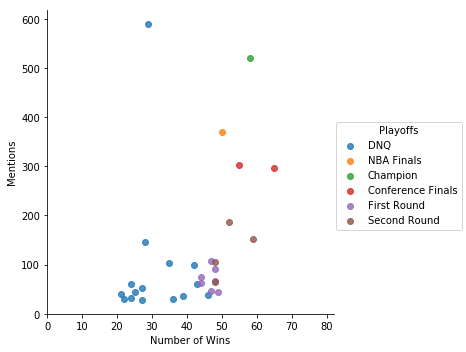

In [91]:
g = sns.lmplot(x="Wins", y="noun_occurrences", hue = "Playoffs",data=team_names,fit_reg = False, legend = True)
g.set_axis_labels(x_var = "Number of Wins", y_var = "Mentions")
g.axes[0,0].set_xlim(0,82)
plt.show()

We notice that the Knicks and the Nets (the two New York teams) both have a disproportionate number of mentions due to the local reporting of NYT. Aside from that, there seems to a strong trend to more mentions with more wins. Both team wins and the depth of the playoffs they reached seem to be strong predictors of reporting.

# Plan:

- Check that outputs correspond roughly to regex frequencies
- Plot frequency of team mentions vs performance
- Pull player stats (value-added and points/rebounds etc.)
- Compare stats to frequencies
- Copmpare stats to frequency/sentiment combination
- Build linear/random forest predictors for mentions/sentiment

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
model = LinearRegression()

In [99]:
team_names

,Name,Wins,Playoffs,noun_occurrences,raw_occurrences,% difference
0,Lakers,35,DNQ,103,103,0.000000
1,Cavaliers,50,NBA Finals,370,369,-0.271003
2,Warriors,58,Champion,521,525,0.761905
3,Celtics,55,Conference Finals,302,297,-1.683502
4,Spurs,47,First Round,108,109,0.917431
5,76ers,52,Second Round,186,195,4.615385
6,Knicks,29,DNQ,590,591,0.169205
7,Bulls,27,DNQ,28,28,0.000000
8,Rockets,65,Conference Finals,296,296,0.000000
9,Raptors,59,Second Round,153,150,-2.000000


In [102]:
model.fit(np.array(team_names.Wins).reshape(-1, 1),team_names.noun_occurrences)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [105]:
model.coef_

array([4.18282548])

In [106]:
model.intercept_

-42.029178208679525